In [5]:
from scSHARP.sc_sharp import scSHARP
from scSHARP.grid_search import GridSearch
import numpy as np
import pandas as pd

In [6]:
data_path = "simulations/splat_0.7/query_counts.csv.gz"
preds_path = "simulations/splat_0.7/preds.csv"
tool_list = ["scina", "scsorter", "sctype", "scpred", "singler"]
marker_path = "simulations/splat_0.7/markers.txt"
ref_path = 'simulations/splat_0.7/ref_counts.csv.gz'
ref_label_path = 'simulations/splat_0.7/ref_labels.csv'
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_list, marker_path, preds_path=preds_path, config=config)

In [7]:
gs = GridSearch(sharp)

In [8]:
# small search
configs = ['/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt']
batch_size=[20, 35]
neighbors=[10, 50]
dropouts=[0.0]

# really small search
# configs = ['/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt']
# batch_size=[20]
# neighbors=[10]
# dropouts=[0.0]

gs_output = gs.model_grid_search(n_workers=4, random_inits=1, configs=configs, batch_size=batch_size, neighbors=neighbors, dropouts=dropouts, training_epochs=20)

[('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', 35, 10, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7ff2d57a94f0>), ('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt', 35, 10, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7ff2d57a94f0>)]
[('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', 20, 10, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7fef897aa4f0>), ('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt', 20, 10, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7fef897aa4f0>)]
[('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', 35, 50, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7fb7e9faa4f0>), ('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt', 35, 50, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7fb7e9faa4f0>)]
[('/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt', 20, 50, 0.0, 20, <scSHARP.sc_sharp.scSHARP object at 0x7f8fdffaa4f0>), ('/Users/maxperozek/CP499/scSHARP_too

In [10]:
list(gs_output)

[(0.9430052042007446,
  {'config': '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt',
   'batch_size': 35,
   'neighbors': 10,
   'dropout': 0.0}),
 (0.9067357778549194,
  {'config': '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt',
   'batch_size': 35,
   'neighbors': 50,
   'dropout': 0.0}),
 (0.9015544056892395,
  {'config': '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_25.txt',
   'batch_size': 20,
   'neighbors': 50,
   'dropout': 0.0}),
 (0.9015544056892395,
  {'config': '/Users/maxperozek/CP499/scSHARP_tool/scSHARP/configs/2_15.txt',
   'batch_size': 20,
   'neighbors': 10,
   'dropout': 0.0})]

In [7]:
preds, train_nodes, test_nodes, keep_cells, conf_scores = sharp.run_prediction(training_epochs=30, thresh=0.51, batch_size=20, seed=8)
print(preds[0:10])
print(conf_scores[0:10])

Loss in epoch 0 = 57.780670
Loss in epoch 10 = 0.056038
Loss in epoch 20 = 0.013589
tensor([0, 0, 2, 0, 3, 3, 1, 2, 1, 2])
tensor([1.0000, 1.0000, 0.9998, 1.0000, 1.0000, 0.9999, 1.0000, 0.9999, 1.0000,
        1.0000], grad_fn=<SliceBackward0>)


In [8]:
sharp.save_model('/Users/maxperozek/Desktop/example_model')

In [9]:
sharp.load_model('/Users/maxperozek/Desktop/example_model')

In [10]:
consensus_preds = sharp.knn_consensus()

/Users/maxperozek/CP499/scSHARP_tool/scSHARP/utilities.py:364: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset  = torch.utils.data.TensorDataset(torch.tensor(counts), torch.tensor(preds))


kNN iter: 10
kNN iter: 20
kNN iter: 30
kNN iter: 40
kNN iter: 50


In [11]:
print(consensus_preds.shape)
print(consensus_preds[:10])
print(np.unique(consensus_preds))
print(len(np.where(consensus_preds == -1))) # assuming that -1 is some kind of error

(1000,)
[0. 0. 1. 0. 3. 3. 1. 3. 1. 2.]
[-1.  0.  1.  2.  3.]
1


In [12]:
int_df = sharp.run_interpretation()

/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/Users/maxperozek/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


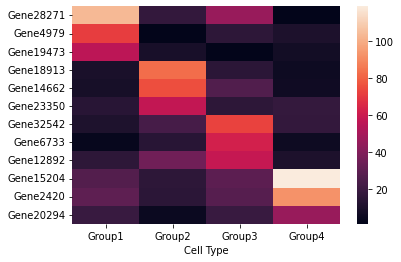

<AxesSubplot:xlabel='Cell Type'>

In [15]:
sharp.heat_map(int_df, n=3)

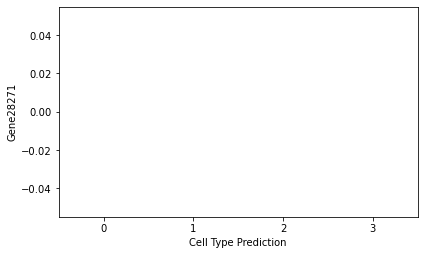

In [13]:
sharp.expression_plots(genes=['Gene28271'])